<h1>Home Assignment #1</h1>


## Task 1. PCA implementation (1 point)

In this task, you are required to create your own class for PCA, implementing methods `fit` and `transform`. Class should require `n_components` parameter in the constructor.

In [25]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [26]:
class my_PCA:
  n_components_ = -1
  components_ = []
  eig_values_ = []
  eig_vectors_ = []
  mean_ = []

  def __init__(self, n_components: int):
    self.n_components_ = n_components

  def fit(self, X):
    self.mean_ = X.mean(axis=0)
    X_centered = X - self.mean_
    cov_mat = np.cov(X_centered.T)
    eig_values, eig_vectors = np.linalg.eigh(cov_mat)
    idx = eig_values.argsort()[::-1]
    self.eig_values_ = eig_values[idx]
    self.eig_vectors_ = eig_vectors[:,idx]
    self.components_ = self.eig_vectors_[:,:self.n_components_]
    return self

  def transform(self, X):
    X_centered = X - np.mean(X, axis=0)
    return np.dot(X_centered, self.components_)

  def restore_data(self, X):
    return np.dot(X, self.components_.T) + self.mean_

Now, create some dataset using `sklearn` and implement fit and transform of your class at created data.

In [27]:
X, y = datasets.make_regression(n_samples=10, n_features=10, n_informative=5, noise=.0, bias=0.5, random_state=2024)
myModel = my_PCA(n_components = 5)
myModel.fit(X)
X_myScaled = myModel.transform(X)
print(X_myScaled)

[[ 2.03597353  1.27911421 -0.68236029  0.32628833 -0.22611484]
 [-1.34094368 -1.75089629 -1.13082959  0.15473829  0.16053277]
 [-1.40374624 -1.95683229  0.70605612 -0.28129639  1.28919325]
 [ 2.14127633 -2.01941803  0.12659879  1.62219264 -0.26160371]
 [-2.63353734  1.00569335  1.03689433  0.73635725 -0.38599562]
 [-1.21196233 -0.61526448  0.91946219 -1.27326579 -1.16328595]
 [-2.08553901  2.37698869 -0.86557841  0.76395109  0.10356908]
 [ 0.99332314 -0.4795848  -1.23051166 -0.86845073 -1.02476985]
 [ 1.02072789  0.96001981 -0.7322914  -0.99721881  1.29443837]
 [ 2.4844277   1.20017982  1.85255993 -0.18329587  0.2140365 ]]


Compare transformed data with one, obtainable using `PCA` implementation from `scikit-learn` library.

In [28]:
model = PCA(n_components = 5)
model.fit(X)
X_scaled = model.transform(X)

print(X_scaled)

[[-2.03597353  1.27911421 -0.68236029  0.32628833 -0.22611484]
 [ 1.34094368 -1.75089629 -1.13082959  0.15473829  0.16053277]
 [ 1.40374624 -1.95683229  0.70605612 -0.28129639  1.28919325]
 [-2.14127633 -2.01941803  0.12659879  1.62219264 -0.26160371]
 [ 2.63353734  1.00569335  1.03689433  0.73635725 -0.38599562]
 [ 1.21196233 -0.61526448  0.91946219 -1.27326579 -1.16328595]
 [ 2.08553901  2.37698869 -0.86557841  0.76395109  0.10356908]
 [-0.99332314 -0.4795848  -1.23051166 -0.86845073 -1.02476985]
 [-1.02072789  0.96001981 -0.7322914  -0.99721881  1.29443837]
 [-2.4844277   1.20017982  1.85255993 -0.18329587  0.2140365 ]]


## Task 2. CIFAR basis (4 points)

Retrieve the data of the CIFAR-10 dataset. Those images has the same shape, making them appropriate for the use of PCA. Your task is to find the most effective basis for the images using PCA you implemented.

In [29]:
(X_train, y_train), (x_test, y_test) = cifar10.load_data()
data = X_train.reshape(-1, 32*32*3)
X_train_reshape = X_train.reshape(-1,32*32*3)
x_test_reshape = x_test.reshape(-1,32*32*3)

In [30]:
model = my_PCA(n_components = 3072)
model.fit(data)

eig_values = model.eig_values_
tot = sum(eig_values)
var_exp = [(i / tot)*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [31]:
optimal_N = None
for i, var in enumerate(cum_var_exp):
  if var > 99:
    print(var)
    optimal_N = i
    break
print(optimal_N)

99.00062099982748
657


In [32]:
n_components = optimal_N
pca = my_PCA(n_components = n_components)
pca.fit(data)

Create function for image approximation visualization using first `N` basis-"images".

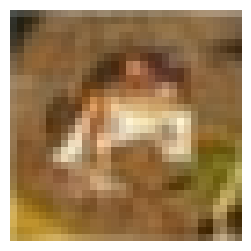

In [33]:
def plot_n_basis(n):
    pca = my_PCA(n_components = n)
    pca.fit(data)
    new_image = pca.transform(data[0])
    new_image = pca.restore_data(new_image)
    new_image = new_image.reshape(32,32,3)
    new_image = (new_image - np.min(new_image)) / (np.max(new_image) - np.min(new_image))
    fig, axes = plt.subplots(1, 1, figsize=(6, 3))
    axes.imshow(new_image)
    axes.axis('off')
    plt.show()

plot_n_basis(657)

Create function to visualize `N`-th basis image.

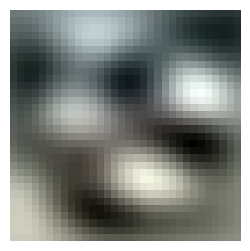

In [34]:
def plot_nth_basis(n):
    fig, axes = plt.subplots(1, 1, figsize=(15, 3))
    new_image = pca.components_.T[n]
    new_image = new_image.reshape(32,32,3)
    new_image = (new_image - np.min(new_image)) / (np.max(new_image) - np.min(new_image))
    axes.imshow(new_image)
    axes.axis('off')
    plt.show()

plot_nth_basis(20)

Train a linear classifier model at image dataset, using logspace-distributed points as the number of components (min – 1, max – all). Use at least 20 distinct numbers of components.

For each trained model, evaluate the model using test set. Plot the dependency of accuracy at test depending on the number of components used by PCA. Explain this dependency.

In [35]:
# write your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define a range of components for PCA
# num_components_range_pca = np.logspace(0, np.log10(X_train.shape[1]), 20).astype(int)
num_components_range_pca = np.ceil(np.logspace(0, np.log(3072), num = 20, base = np.e)).astype(int)

# Lists to store accuracy scores
accuracy_scores_pca = []

for num_components in num_components_range_pca:
    # Create an instance of your custom PCA class
    pca = my_PCA(n_components=num_components)

    # Fit the PCA model to the training data
    pca.fit(X_train_reshape)

    # Transform training and test data using PCA
    X_train_pca = pca.transform(X_train_reshape)
    X_test_pca = pca.transform(x_test_reshape)

    # Train a linear classifier (Logistic Regression) on transformed training data
    clf = LogisticRegression()
    clf.fit(X_train_pca, y_train)

    # Evaluate the model on the transformed test data
    y_pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy score
    accuracy_scores_pca.append(accuracy)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

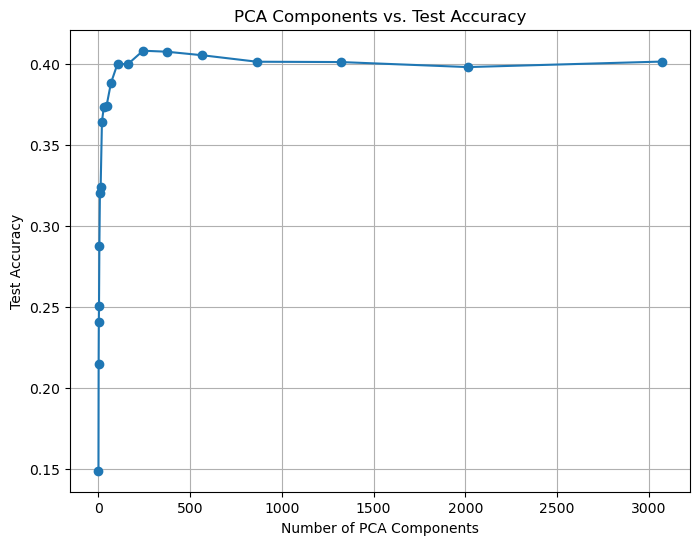

In [36]:
# Plot the dependency of accuracy on the number of components
plt.figure(figsize=(8, 6))
plt.plot(num_components_range_pca, accuracy_scores_pca, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Test Accuracy')
plt.title('PCA Components vs. Test Accuracy')
# plt.xscale('log')
plt.grid(True)
plt.show()

As you may notice, many basis images have negative elements, although the data itself is purely non-negative. Why is it so, why do we have negative elements from mathematical point of view? In what cases negative elements may be absent in PCA projection vectors?

*write your answer here*

Explanation of Dependency:

The plot will show how the test accuracy varies with the number of PCA components. You should observe an initially increasing trend in accuracy as you increase the number of components. This is because PCA components capture the most significant sources of variation in the data.


However, there will be a point where adding more components does not significantly improve accuracy or may even lead to overfitting, resulting in a plateau or a drop in accuracy. This is because additional components may capture noise or minor variations that are not informative for classification.

1. Mathematical Perspective:

Orthogonal Transformation (PCA): PCA is a technique that finds orthogonal components (principal components) that capture the maximum variance in the data. These components are determined through linear combinations of the original features. Since the objective is to capture variance, some of these linear combinations can have negative coefficients if they help explain the data's variance better.

Non-Negative Linear Combinations (NMF): In contrast, NMF enforces non-negativity constraints on both the basis and coefficient matrices. While this constraint ensures that the basis images (components) and their linear combinations are non-negative, it may limit the ability of NMF to capture certain patterns, especially when the data has both positive and negative correlations.

2. Cases When Negative Elements May Be Absent in PCA Projection Vectors:

Data with Strictly Positive Correlations: In some cases, when the data has strictly positive correlations and no significant negative correlations, the PCA projection vectors (principal components) may not have negative elements. This is more likely to occur when the data inherently follows a positive structure, and PCA can capture this structure without needing negative coefficients.

Data Centering: Centering the data by subtracting the mean before applying PCA can sometimes help ensure that the resulting principal components have more intuitive and positive elements. Centering shifts the origin of the data to zero, and PCA then captures variance around this centered point.

Data Scaling: Scaling the data to have unit variance in each dimension can also affect the signs of PCA components. Scaling can lead to more consistent signs in the components, although the overall direction (positive or negative) can still vary.

---

There are matrix decompositions, that may be more useful than SVD in particular cases. For example, non-negative matrix factorization. You should implement [it](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization#Algorithms) and use at the CIFAR-10 dataset.

In [37]:
def nmf(X, num_components, max_iterations=100, tol=1e-6):
    m, n = X.shape
    # Initialize W and H with random values
    W = np.random.rand(m, num_components)
    H = np.random.rand(num_components, n)

    for iteration in range(max_iterations):
        # Update H
        H *= (W.T @ X) / (W.T @ W @ H + 1e-9)

        # Update W
        W *= (X @ H.T) / (W @ H @ H.T + 1e-9)

        # Calculate the Frobenius norm of the error
        error = np.linalg.norm(X - W @ H)

        # Check for convergence
        if error < tol:
            break

    return W, H

In [14]:
X = data

# Number of components for factorization
num_components = 657

# Perform NMF
W, H = nmf(X, num_components, max_iterations = 200)

print("Original Matrix (X):")
print(X)
print("\nBasis Matrix (W):")
print(W)
print("\nCoefficient Matrix (H):")
print(H)
print("\nReconstructed Matrix (W * H):")
print(W @ H)

Original Matrix (X):
[[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [ 35 178 235 ...  12  31  50]
 [189 211 240 ... 195 190 171]
 [229 229 239 ... 163 163 161]]

Basis Matrix (W):
[[1.27007874e-05 8.64299752e-03 3.59684877e-01 ... 8.09234907e-04
  1.44341242e+00 9.40052377e-03]
 [3.79670291e-01 5.97853273e-01 5.32504777e-02 ... 2.64839604e-02
  3.04622761e-01 8.97212836e-01]
 [1.39884597e-02 3.40564052e-01 5.25139566e+00 ... 3.80913273e-01
  5.76954615e-04 7.79391959e-01]
 ...
 [4.41886662e-01 5.49516190e-01 2.65005833e+00 ... 2.43027624e-03
  3.02279750e-05 3.49664486e-05]
 [4.64339454e-01 7.10270762e-01 1.40967947e+00 ... 9.62447592e-01
  1.29617896e+00 2.14364841e+00]
 [5.51248832e-01 2.25869381e+00 8.51188203e-02 ... 2.09576116e-03
  9.30716111e-01 1.01095227e-02]]

Coefficient Matrix (H):
[[0.00754369 0.05646238 0.04342472 ... 0.1617217  0.12420858 0.11777894]
 [0.02910837 0.03578062 0.07787784 ... 0.02125735 0.0226326  0.0029569

In [38]:
W = np.loadtxt(f"./MFR/W_921_1000.csv", delimiter=",")
H = np.loadtxt(f"./MFR/H_921_1000.csv", delimiter=",")
print(W.shape, H.shape)

(10000, 921) (921, 3072)


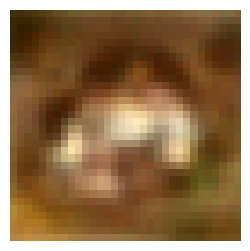

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(15, 3))
new_image = (W @ H).reshape(50000,32,32,3)[0]
new_image = (new_image - np.min(new_image)) / (np.max(new_image) - np.min(new_image))
axes.imshow(new_image)
axes.axis('off')
plt.show()

In [16]:
print(W.shape)
print(H.shape)

(50000, 657)
(657, 3072)


Do not forget to check, that $W H = V$.  
Which of those matrices contains basis images? Why do you think so? What is inside the other matrix?

*write your answer here*

NMF will produce two matrices W and H. The columns of W can be interpreted as images (the basis images), and H tells us how to sum up the basis images in order to reconstruct an approximation to a given face.

The columns of the basis matrix (W) are often referred to as basis images or components. These basis images are learned by NMF from the input data and are constructed in such a way that they are non-negative linear combinations of the original features (in the case of images, these features are pixel values). Each basis image captures certain patterns or features present in the data.

The coefficient matrix (H) contains non-negative coefficients for each basis image. Each column of H corresponds to a specific data point (in your case, a face), and the coefficients in that column represent how much of each basis image is needed to reconstruct the corresponding data point.

Compare first five basis images created by PCA and by NNMF (Find 5 best NNMF basises). Write down your observations.

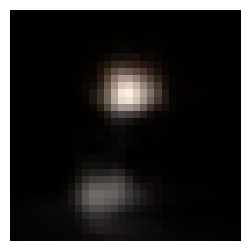

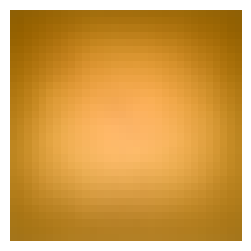

In [17]:
# Calculate the L2-norm for each basis vector in W
norms = np.linalg.norm(W, axis=0)

# Create a list of tuples containing (basis_vector_index, norm_value)
basis_vector_indices_with_norms = [(i, norm) for i, norm in enumerate(norms)]

# Sort the list by norm values in descending order
basis_vector_indices_with_norms.sort(key=lambda x: x[1], reverse=True)

# Get the indices of the first 5 most important basis vectors
top_5_indices = [index for index, _ in basis_vector_indices_with_norms[:5]]
# Retrieve the first 5 most important basis vectors from W
top_5_basis_vectors = W[:, top_5_indices]

# Retrieve the corresponding coefficients from H
top_5_coefficients = H[top_5_indices, :]

image = top_5_basis_vectors @ top_5_coefficients
fig, axes = plt.subplots(1, 1, figsize=(15, 3))
new_image = image.reshape(50000,32,32,3)[0]
new_image = (new_image - np.min(new_image)) / (np.max(new_image) - np.min(new_image))
axes.imshow(new_image)
axes.axis('off')
plt.show()

plot_n_basis(5)

*write your answer here*

Orthogonal Components: PCA produces orthogonal principal components, which capture the maximum variance in the data. This property simplifies interpretation and can lead to more compact representations of the data.

Mathematical Simplicity: PCA is mathematically well-defined and straightforward to implement. It has a clear connection to eigenvalue decomposition, making it widely used and understood.

Non-Negativity Constraint: NMF enforces non-negativity constraints on both the basis and coefficient matrices. This property makes it well-suited for datasets where negative values don't have meaningful interpretations, such as images, text, or gene expression data.

Randomly choose some images, re-create them using PCA and NNMF. How do the resulting images differ? Write down your observations.

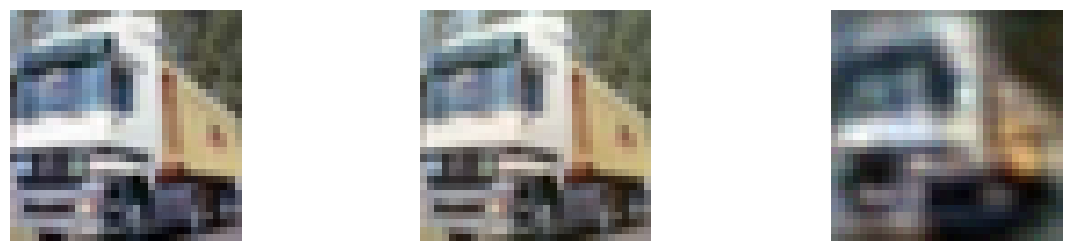

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
source_image = data[1].reshape(32,32,3)
source_image = (source_image - np.min(source_image)) / (np.max(source_image) - np.min(source_image))
new_image_PCA = pca.transform(data[1])
new_image_PCA = pca.restore_data(new_image_PCA).reshape(32,32,3)
new_image_PCA = (new_image_PCA - np.min(new_image_PCA)) / (np.max(new_image_PCA) - np.min(new_image_PCA))
new_image_NNMF = (W @ H).reshape(50000,32,32,3)[1]
new_image_NNMF = (new_image_NNMF - np.min(new_image_NNMF)) / (np.max(new_image_NNMF) - np.min(new_image_NNMF))
axes[0].imshow(source_image)
axes[0].axis('off')
axes[1].imshow(new_image_PCA)
axes[1].axis('off')
axes[2].imshow(new_image_NNMF)
axes[2].axis('off')
plt.show()

*write your answer here*

PCA-Reconstructed Image (Middle Image):

The middle image is the result of reconstructing the selected image using PCA.
PCA attempts to capture the most significant patterns and variations in the data. As a result, the PCA-reconstructed image may capture the global structure and major features of the original image.
Depending on the number of PCA components used, the reconstructed image may have a smoother appearance, as PCA tends to focus on capturing global variations.

NMF-Reconstructed Image (Rightmost Image):

The rightmost image is the result of reconstructing the selected image using Non-Negative Matrix Factorization (NMF).
NMF aims to represent the data using additive parts, making it particularly suitable for capturing localized features or patterns.
The NMF-reconstructed image may emphasize specific parts or details of the original image, such as edges, textures, or objects. It may exhibit a more "parts-based" appearance compared to PCA.



Train a linear classifier model at image dataset, using logspace-distributed points as the number of non-negative components (min – 1, max – all). Use at least 20 distinct numbers of components.

For each trained model, evaluate the model using test set. Plot the dependency of accuracy at test depending on the number of components used by NNMF. Explain this dependency. Compare and contrast the dependency to one retrieved by PCA.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import NMF

# Define a range of components for NMF
# num_components_range_nmf = np.logspace(0, np.log10(X_train.shape[1]), 20).astype(int)
range_num_comp = np.logspace(np.log10(1), np.log10(32*32*3), 21).astype(int)[1:]
range_num_comp[-1] += 1
# num_components_range_nmf = np.ceil(np.logspace(0, np.log(3072), num = 20, base = np.e)).astype(int)

# Lists to store accuracy scores
accuracy_scores_nmf_train = []
accuracy_scores_nmf_test = []

print(y_test.shape)
y_test = y_train[9000:10000,]
y_train = y_train[:9000,]
print(y_test.shape, y_train.shape)
for num_components in range_num_comp:
    # Create an NMF model with the specified number of components
    W = np.loadtxt(f"./MFR/W_{num_components}_1000.csv", delimiter=",")
    if num_components == 1:
        W = W.reshape(-1,1)

    # Fit the NMF model to the training data and transform data
    X_train_nmf = W[:9000,]
    X_test_nmf = W[9000:,]

    # Train a linear classifier (Logistic Regression) on transformed training data
    clf = LogisticRegression(solver='saga', random_state=2000)
    clf.fit(X_train_nmf, y_train)

    # Evaluate the model on the transformed test data
    y_pred_train = clf.predict(X_train_nmf)
    y_pred_test = clf.predict(X_test_nmf)
    accuracy_scores_nmf_train.append(accuracy_score(y_train, y_pred_train))
    print(y_test.shape, y_pred_test.shape)
    accuracy_scores_nmf_test.append(accuracy_score(y_test, y_pred_test))
    
    

(10000, 1)
(1000, 1) (9000, 1)
(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1000, 1) (1000,)
(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1000, 1) (1000,)


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1000, 1) (1000,)


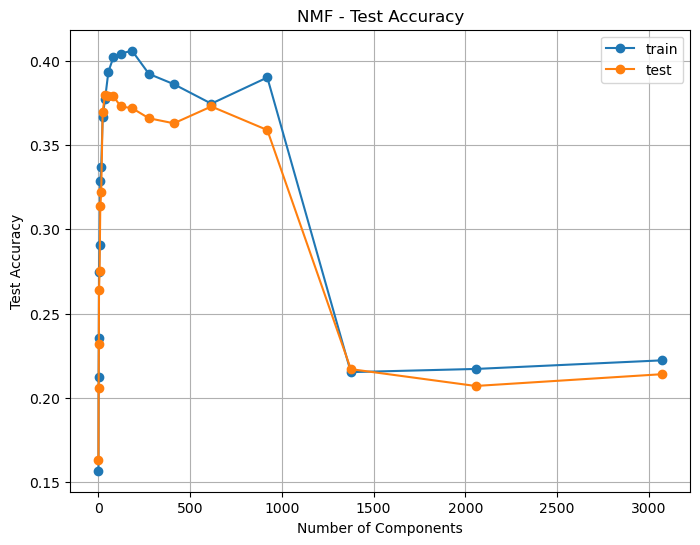

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(range_num_comp, accuracy_scores_nmf_train, marker='o', label='train')
plt.plot(range_num_comp, accuracy_scores_nmf_test, marker='o', label='test')  # Include PCA results
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.title('NMF - Test Accuracy')
# plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

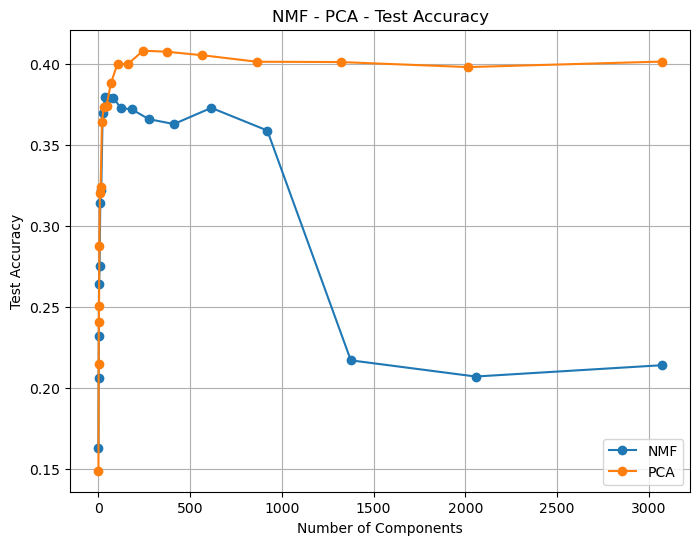

In [39]:
# Plot the dependency of accuracy on the number of NMF components and PCA components
plt.figure(figsize=(8, 6))
plt.plot(range_num_comp, accuracy_scores_nmf_test, marker='o', label='NMF')
plt.plot(num_components_range_pca, accuracy_scores_pca, marker='o', label='PCA')  # Include PCA results
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.title('NMF - PCA - Test Accuracy')
# plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()


The plot will show how the test accuracy varies with the number of NMF components. You should observe an initially increasing trend in accuracy as you increase the number of components. This is because adding more components allows the model to capture more information from the data.

However, there will be a point where adding more components does not significantly improve accuracy or may even lead to overfitting, resulting in a plateau or a drop in accuracy. This is similar to the behavior observed with PCA, where adding more components eventually provides diminishing returns in terms of capturing useful information.

The dependency of accuracy on the number of components in NMF may be different from PCA because NMF focuses on parts-based representations and may emphasize different aspects of the data compared to PCA's orthogonal global patterns.

The choice of the optimal number of components for NMF (and PCA) depends on the specific dataset and task. It involves a trade-off between capturing meaningful information and preventing overfitting.

To compare and contrast with PCA, you can overlay the results of PCA on the same plot by including the relevant code (uncommented) that performs a similar analysis for PCA, using the same range of components. This will allow you to visually compare the dependencies of accuracy on the number of components between NMF and PCA.